In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
data=pd.read_csv("github/sensor_data/sensor_data_700.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))
d=data[(data["time"] < 160000) & (data["time"] >= 120000)]

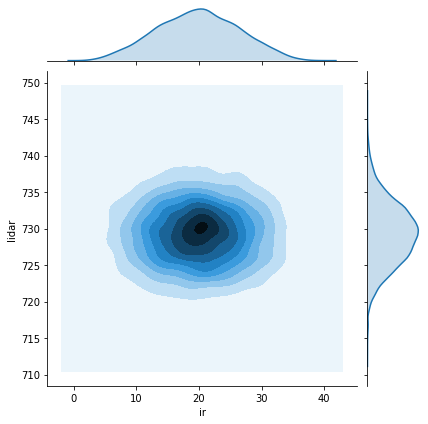

In [3]:
d=d.loc[:, ["ir", "lidar"]]
sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [10]:
print(d.ir.var(), d.lidar.var())
print(d.cov())
diff_ir=(d.ir-d.ir.mean())
diff_lidar=(d.lidar-d.lidar.mean())

42.117126367701594 17.702026469211457
              ir      lidar
ir     42.117126  -0.316778
lidar  -0.316778  17.702026


In [16]:
np.dot(diff_ir.values,diff_lidar.values)/(len(diff_ir.values)-1)

-0.31677803385436926

In [19]:
from scipy.stats import multivariate_normal

irlidar=multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

In [31]:
x,y = np.mgrid[0:40, 710:750]
pos=np.zeros(x.shape+(2,))
pos[:,:,0]=x
pos[:,:,1]=y

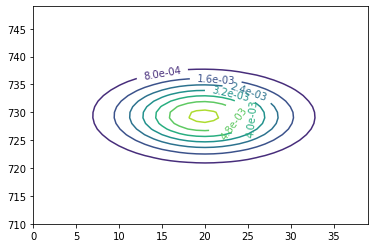

In [32]:
cont=plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')
plt.show()